In [1]:
# Overview
# In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various 
# themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts 
# accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral)
# expressed in these posts. 
# This assignment will enhance your understanding of text classification, sentiment analysis, and the 
# practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).

# Dataset
# The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. 
# Each row represents a blog post with the following columns:
# Text: The content of the blog post. Column name: Data
# Category: The category to which the blog post belongs. Column name: Labels

In [2]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Loading the dataset

df = pd.read_csv('blogs_categories.csv')
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [5]:
df=df.rename(columns = {'Unnamed: 0':'ID'})
df

,ID,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [6]:
# Exploratory data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      19997 non-null  int64 
 1   Data    19997 non-null  object
 2   Labels  19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [7]:
df.shape

(19997, 3)

In [8]:
df.head()

,ID,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [9]:
df.tail()

,ID,Data,Labels
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19996,19996,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc


In [10]:
df.columns

Index(['ID', 'Data', 'Labels'], dtype='object')

In [11]:
df.describe()

,ID
count,19997.000000
mean,9998.000000
std,5772.781002
min,0.000000
25%,4999.000000
50%,9998.000000
75%,14997.000000
max,19996.000000


In [12]:
from sklearn.preprocessing import LabelEncoder
cols = ['Labels']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df

,ID,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,0
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,0
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,0
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,0
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,0
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,19
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,19
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,19
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,19


In [13]:
# Handling missing values

# No null values
df.isnull().sum()

ID        0
Data      0
Labels    0
dtype: int64

C:\Users\mihir\AppData\Local\Temp\ipykernel_20624\4044754228.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Labels'])


<Axes: xlabel='Labels', ylabel='Density'>

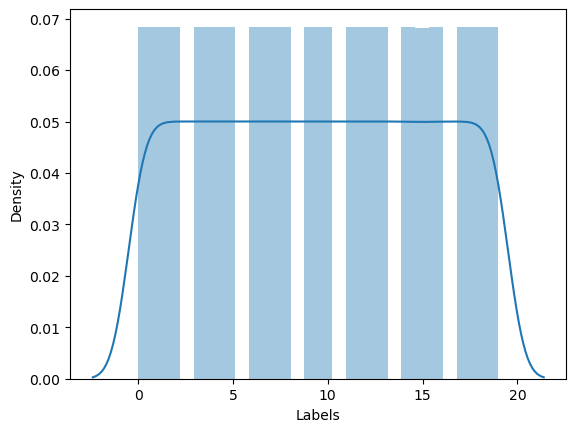

In [14]:
# Visualizations

sns.distplot(df['Labels'])

In [15]:
# TFIDF Vectorizer

vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=None)

In [16]:
x = vectorizer.fit_transform(df['Data'])
x.shape

(19997, 209375)

In [17]:
y = df['Labels']
y.shape

(19997,)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
clf = naive_bayes.MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [20]:
preds = clf.predict_proba(x_test)
preds

array([[0.00141961, 0.00045723, 0.00041836, ..., 0.00328194, 0.00599051,
        0.00151774],
       [0.00564844, 0.01680414, 0.02412469, ..., 0.00219923, 0.00246493,
        0.00659817],
       [0.0557108 , 0.01473491, 0.01718143, ..., 0.02757006, 0.06264606,
        0.08125061],
       ...,
       [0.04439484, 0.02183488, 0.0228458 , ..., 0.03881974, 0.05464411,
        0.05979003],
       [0.01161493, 0.00867679, 0.00574108, ..., 0.0118371 , 0.03780441,
        0.02504679],
       [0.02925085, 0.07717905, 0.04179439, ..., 0.0174636 , 0.02998082,
        0.02339426]])

In [21]:
roc_auc = roc_auc_score(y_test,preds, multi_class='ovr')
print(roc_auc)

0.9945001114362654


In [22]:
# Sentiment analysis

from transformers import pipeline
from transformers import DistilBertTokenizer,DistilBertForSequenceClassification

In [23]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased-finetuned-sst-2-english')

In [24]:
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
texts = 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49'
results = nlp(texts)

for text, result, score in zip(texts, results, df.Labels.values):
    print('Text:', text)
    print('Result:', result)
    print('Score:', score)

Text: X
Result: {'label': 'NEGATIVE', 'score': 0.9768259525299072}
Score: 0


In [25]:
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
texts = 'Newsgroups: alt.atheism\nPath: cantaloupe.srv.'
results = nlp(texts)

for text, result, score in zip(texts, results, df.Labels.values):
    print('Text:', text)
    print('Result:', result)
    print('Score:', score)

Text: N
Result: {'label': 'NEGATIVE', 'score': 0.9833574295043945}
Score: 0


In [26]:
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
texts = 'Xref: cantaloupe.srv.cs.cmu.edu talk.religion'
results = nlp(texts)

for text, result, score in zip(texts, results, df.Labels.values):
    print('Text:', text)
    print('Result:', result)
    print('Score:', score)

Text: X
Result: {'label': 'NEGATIVE', 'score': 0.9558399319648743}
Score: 0


In [27]:
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
texts = 'Whatever promises that have been made can than be broken. John Laws, a man without the honor to keep his given word.'
results = nlp(texts)

for text, result, score in zip(texts, results, df.Labels.values):
    print('Text:', text)
    print('Result:', result)
    print('Score:', score)

Text: W
Result: {'label': 'NEGATIVE', 'score': 0.9860793948173523}
Score: 0
